In [14]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import datetime
import numpy as np

read_path = r'C:\Users\XeniaRieger\OneDrive - bwedu\Dokumente\Studium Master\1. Semester\Data Literacy\Data-Literacy\Daten\joined_survey_article_standardized_median.csv'
df = pd.read_csv(read_path, delimiter=';', header=0)
df["date"] = pd.to_datetime(df["date"], format="%d.%m.%Y")
df["SPD"] = pd.to_numeric(df["SPD"], errors='coerce')
df["Union"] = pd.to_numeric(df["Union"], errors='coerce')
df["Grüne"] = pd.to_numeric(df["Grüne"], errors='coerce')
df["FDP"] = pd.to_numeric(df["FDP"], errors='coerce')
df["AfD"] = pd.to_numeric(df["AfD"], errors='coerce')
df["Linke"] = pd.to_numeric(df["Linke"], errors='coerce')
df

,Unnamed: 0,date,SPD,Union,Grüne,FDP,AfD,Linke,FW,Andere,standardized_war_articles
0,0,2023-12-22,14.0,32.0,14.0,5.0,21.0,3.0,4,7,0.149730
1,1,2023-12-07,14.0,32.0,15.0,4.0,21.0,3.0,3,8,0.169740
2,2,2023-11-10,15.0,30.0,15.0,5.0,21.0,4.0,3,7,0.193503
3,3,2023-11-02,16.0,30.0,14.0,4.0,22.0,5.0,3,6,0.179060
4,4,2023-10-13,15.0,29.0,13.0,5.0,23.0,4.0,4,7,0.195236
...,...,...,...,...,...,...,...,...,...,...,...
685,685,2000-07-01,39.0,38.0,6.0,8.0,NaN,5.0,-,4,0.008333
686,686,2000-06-01,38.0,39.0,7.0,9.0,NaN,5.0,-,2,0.015557
687,687,2000-05-01,41.0,36.0,6.0,7.0,NaN,5.0,-,5,0.027951
688,688,2000-04-07,39.0,34.0,8.0,7.0,NaN,7.0,-,5,0.014863


In [15]:
df = df.loc[df["date"].dt.year == 2003]
corr_matrix = df.corr()
spd_true = corr_matrix["standardized_war_articles"]["SPD"]
union_true = corr_matrix["standardized_war_articles"]["Union"]
grüne_true = corr_matrix["standardized_war_articles"]["Grüne"]
fdp_true = corr_matrix["standardized_war_articles"]["FDP"]
afd_true = corr_matrix["standardized_war_articles"]["AfD"]
linke_true = corr_matrix["standardized_war_articles"]["Linke"]
corr_matrix

,Unnamed: 0,SPD,Union,Grüne,FDP,AfD,Linke,standardized_war_articles
Unnamed: 0,1.000000,0.515378,-0.340105,0.161272,-0.139239,NaN,-0.238186,0.785330
SPD,0.515378,1.000000,-0.907977,-0.408637,-0.027309,NaN,0.125225,0.395786
Union,-0.340105,-0.907977,1.000000,0.393945,-0.209666,NaN,-0.236011,-0.209995
Grüne,0.161272,-0.408637,0.393945,1.000000,-0.313670,NaN,-0.549350,0.210198
FDP,-0.139239,-0.027309,-0.209666,-0.313670,1.000000,NaN,0.239064,-0.402991
AfD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Linke,-0.238186,0.125225,-0.236011,-0.549350,0.239064,NaN,1.000000,-0.392344
standardized_war_articles,0.785330,0.395786,-0.209995,0.210198,-0.402991,NaN,-0.392344,1.000000


In [ ]:
B = 10000
# data frame with column for each party and 10000 rows with their correlation value
corr_values = pd.DataFrame(columns=["SPD", "Union", "Grüne", "FDP", "AfD", "Linke"])
# permute article number
for x in range(B):
    df_permutated = df
    index = len(corr_values)
    df_permutated.loc["standardized_war_articles"] = np.random.permutation(df["standardized_war_articles"])
    corr_matrix_permuted = df_permutated.corr()
    corr_values.loc[index, "SPD"] = corr_matrix_permuted["standardized_war_articles"]["SPD"]
    corr_values.loc[index, "Union"] = corr_matrix_permuted["standardized_war_articles"]["Union"]
    corr_values.loc[index, "Grüne"] = corr_matrix_permuted["standardized_war_articles"]["Grüne"]
    corr_values.loc[index, "FDP"] = corr_matrix_permuted["standardized_war_articles"]["FDP"]
    corr_values.loc[index, "AfD"] = corr_matrix_permuted["standardized_war_articles"]["AfD"]
    corr_values.loc[index, "Linke"] = corr_matrix_permuted["standardized_war_articles"]["Linke"]

corr_values

C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_12584\19194011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permutated["standardized_war_articles"] = np.random.permutation(df["standardized_war_articles"])
C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_12584\19194011.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_permutated["standardized_war_articles"] = np.random.permutation(df["standardized_war_articles"])
C:\Users\XeniaRieger\AppData\Local\Temp\ipykernel_12584\19194011.py:8: Setting

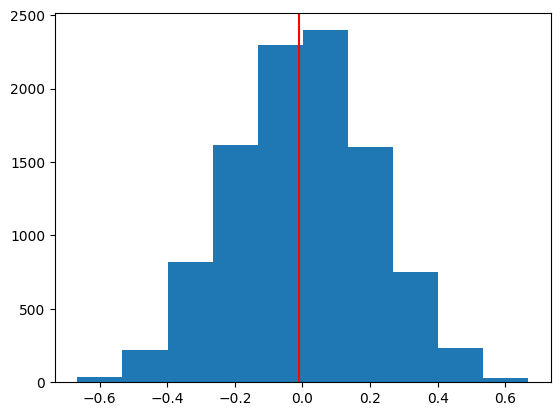

In [11]:
fig, axs = plt.subplots()
axs.hist(corr_values["Linke"])
axs.axvline(linke_true, alpha=1.0, color="red")